# Projeto Módulo 01 -  Análise Exploratória: Produção Hospitalar (SIH/SUS)
## Análise exploratória dos dados do DATASUS - Produção Hospital (SIH/SUS)

# Visão geral do projeto:

- ## Nota ténica e origem dos dados utilizados
- ## Importação e Organização dos dados
- ## Primeiras análises
- ## Hipótese
- ## Pesquisa complementar
- ## Conclusão
- ## Referências e citações

---


## Nota ténica e origem dos dados utilizados

Origem dos dados: http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sih/cnv/qiuf.def

Nota técnica dos dados: http://tabnet.datasus.gov.br/cgi/sih/Proced_hosp_loc_int_2008.pdf


### AIH aprovadas
Quantidade de AIH(Autorização de Internação Hospitalar) aprovadas no período, tanto de novas internações como de prorrogação (longa permanência). Não estão computadas as AIH rejeitadas.

Filtros aplicados:
 - Linha: Unidade da Federação
 - Coluna: Ano/Mês atendimento
 - Conteúdo: AIH aprovadas
 - Períodos disponíveis: Jan/2008 até Mar/2021
 
     dataset path: "../datasets/AIH_aprovadas.csv"


### Dias de Permanência
Total de dias de internação referentes às AIH aprovadas no período. São contados os
dias entre a baixa e a alta. Exemplo: internação = 15/02/2003; alta = 18/02/2003; dias de
permanência = 3.
Nota: este valor não pode ser utilizado para calcular a ocupação da unidade hospitalar,
por incluir períodos fora do mês e os períodos em que o paciente utilizou UTI. 

Filtros aplicados:
 - Linha: Unidade da Federação
 - Coluna: Ano/Mês atendimento
 - Conteúdo: Dias permanência
 - Períodos disponíveis: Jan/2008 até Mar/2021
 
     dataset path: "../datasets/A180928189_28_143_208.csv"
 
 
 ### Taxa de Mortalidade
 Razão entre a quantidade de óbitos e o número de AIH aprovadas, computadas como
internações, no período, multiplicada por 100. 

 Filtros aplicados:
 - Linha: Unidade da Federação
 - Coluna: Ano/Mês atendimento
 - Conteúdo: Taxa de mortalidade
 - Períodos disponíveis: Jan/2008 até Mar/2021
 
    datset path: "../datasets/A180955189_28_143_208.csv"
---

In [1]:
#importação das bibliotecas utilizadas no decorrer do notebook
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Importação e Organização dos dados

In [2]:
#Lendo o arquivo "../datasets/AIH_aprovadas.csv" com separador ";" 
#Foi aplicado a leitura para codificação de caracteres "ISO-8859-1"
#Também foi removido a ultima linha com o skipfooter para remover o total já calculado
#O "usecols" foi aplicado para puxar apenas os meses de 2008/Jan até 2021/Mar e excluindo a coluna de Total
#e para finalizar a importação, coloquei o engine='python' para remover uma mensagem de warning em relação a importação
df_AIH_aprovadas = pd.read_csv("../datasets/AIH_aprovadas.csv", sep=";", 
                   encoding="ISO-8859-1",
                   usecols = [i for i in range(287) if (i == 0 or i > 127 and i < 286)],
                   skipfooter=1, engine='python')
#setando o index como "Unidade da Federação"
df_AIH_aprovadas = df_AIH_aprovadas.set_index("Unidade da Federação")

#mostrando as 5 primeiras linhas do dataframe
df_AIH_aprovadas.head()

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,...,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,5562,5105,5175,5148,6099,7080,7332,6875,6907,6699,...,7638,8376,8848,8379,8791,8865,8362,7221,4779,2106
12 Acre,3723,4163,4223,4471,4478,4083,3823,4182,4141,3928,...,3073,3571,3574,3725,3985,3849,3861,3588,2898,1788
13 Amazonas,13830,14870,14323,14914,14578,14938,14419,13349,12607,12137,...,13943,15417,15709,15727,15796,15424,16213,16344,10777,6256
14 Roraima,1739,2047,2211,2415,2295,2228,2298,2116,2205,2122,...,2974,3080,3332,3302,3404,3248,3358,3356,2855,2154
15 Pará,40231,43323,44804,44901,43422,42168,42630,43168,41580,39506,...,32351,36010,37071,36673,38418,37120,35613,33495,24261,14718


In [3]:
#Lendo o arquivo "../datasets/A180928189_28_143_208.csv" com separador ";" 
#Foi aplicado a leitura para codificação de caracteres "ISO-8859-1"
#Também foi removido as 3 primeiras e 12 ultimas linhas de cabeçalho e rodapé com skipwors e skipfooter
#O "usecols" foi aplicado para puxar apenas os meses de 2008/Jan até 2021/Mar e excluindo a coluna de Total
#e para finalizar a importação, coloquei o engine='python' para remover uma mensagem de warning em relação a importação
df_dias_permanencia = pd.read_csv("../datasets/A180928189_28_143_208.csv", sep=";",
                      encoding="ISO-8859-1",
                      skiprows=3, skipfooter=12,
                      usecols = [i for i in range(287) if (i == 0 or i > 127 and i < 286)],
                       engine='python')

#setando o index como "Unidade da Federação"
df_dias_permanencia = df_dias_permanencia.set_index("Unidade da Federação")

#mostrando as 5 primeiras linhas do dataframe
df_dias_permanencia.head()

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,...,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,18935,19149,20781,24128,25330,27407,26579,24689,23869,24245,...,35644,39419,41957,37996,40299,38786,36622,33143,21414,8504
12 Acre,17750,19247,19548,20171,19161,17174,15399,17695,18034,16696,...,16463,18224,16861,16905,18362,17657,18823,15721,11739,5459
13 Amazonas,67168,69290,68972,72484,69073,69493,64874,61161,58438,55027,...,76037,82246,84645,83803,83667,81126,83844,92994,55118,24471
14 Roraima,8631,9602,9991,11212,9771,11610,10840,10584,10417,9685,...,16717,18235,19711,17862,19637,18699,19174,20482,16315,8398
15 Pará,153304,163345,167012,166820,164090,157961,156810,154258,153498,144765,...,146964,154549,155788,149044,159732,148979,145302,135108,90114,46955


In [4]:
#Lendo o arquivo "../datasets/A180955189_28_143_208.csv" com separador ";" 
#Foi aplicado a leitura para codificação de caracteres "ISO-8859-1"
#Também foi removido as 3 primeiras e 12 ultimas linhas de cabeçalho e rodapé com skipwors e skipfooter
#O "usecols" foi aplicado para puxar apenas os meses de 2008/Jan até 2021/Mar e excluindo a coluna de Total
#O "decimal" foi utilizado para indicar qual é o padrão que o dataset usou como ponto flutuante(casa decimal)
#e para finalizar a importação, coloquei o engine='python' para remover uma mensagem de warning em relação a importação
df_taxa_mortalidade = pd.read_csv("../datasets/A180955189_28_143_208.csv", sep=";",
                      encoding="ISO-8859-1",
                      skiprows=3, skipfooter=12,
                      usecols = [i for i in range(172) if (i == 0 or i > 12 and i < 171)],
                      decimal=",",
                      engine='python')

#setando o index como "Unidade da Federação"
df_taxa_mortalidade = df_taxa_mortalidade.set_index("Unidade da Federação")

#mostrando as 5 primeiras linhas do dataframe
df_taxa_mortalidade.head()

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,...,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,1.17,2.02,1.86,1.79,1.74,1.13,0.97,1.12,1.26,1.18,...,5.81,4.61,4.78,4.00,3.22,3.68,4.81,5.82,5.75,12.82
12 Acre,3.09,2.64,2.44,2.30,2.14,2.25,0.99,1.72,2.13,1.96,...,6.77,5.64,4.20,3.52,3.07,3.83,4.50,3.73,4.18,3.69
13 Amazonas,2.21,1.83,2.06,2.04,1.96,1.64,1.62,1.54,1.87,1.68,...,5.38,4.67,4.35,4.41,4.37,4.92,6.16,15.03,7.66,5.26
14 Roraima,1.04,1.37,1.22,1.08,1.53,1.80,1.70,1.94,1.59,1.56,...,10.29,5.16,2.94,3.00,2.97,4.09,4.14,7.90,10.33,7.43
15 Pará,1.45,1.48,1.39,1.41,1.49,1.49,1.52,1.43,1.52,1.51,...,4.99,3.87,3.22,2.87,2.82,2.63,3.16,3.54,3.65,3.70


## Primeiras análises

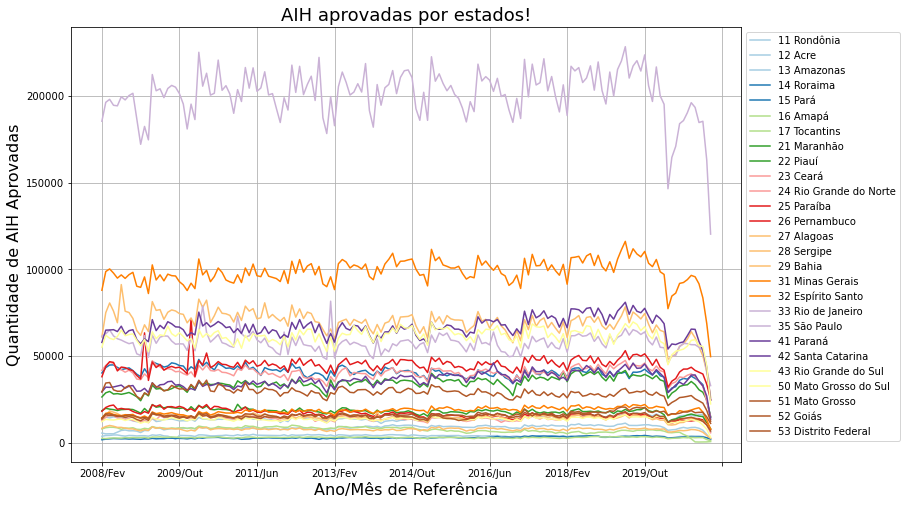

In [5]:
#Plotagem do gráfico da quantidade de AIH aprovadas por estado
ax = df_AIH_aprovadas.T.plot(figsize=(12,8), cmap=plt.get_cmap('Paired')) #configuração do tamanho do gráfico e paleta de cor
ax.set_xlabel('Ano/Mês de Referência', fontsize=16) #Descrição do eixo X
ax.set_ylabel('Quantidade de AIH Aprovadas', fontsize=16) #Descrição do eixo Y
plt.title('AIH aprovadas por estados!', fontsize=18) #Titulo
plt.grid(True) #Adicionando grade
plt.legend(bbox_to_anchor=(1, 1)) #Posicionando a legenda
plt.show() #plotando o gráfico

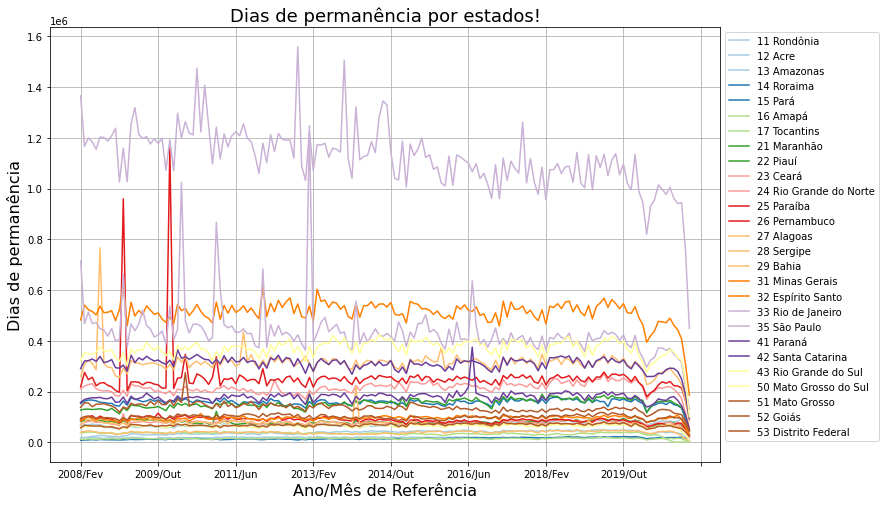

In [6]:
#Plotagem do gráfico da quantidade dias de permanência por estado
ax = df_dias_permanencia.T.plot(figsize=(12,8), cmap=plt.get_cmap('Paired')) #configuração do tamanho do gráfico e paleta de cor
ax.set_xlabel('Ano/Mês de Referência', fontsize=16) #Descrição do eixo X
ax.set_ylabel('Dias de permanência', fontsize=16) #Descrição do eixo Y
plt.title('Dias de permanência por estados!', fontsize=18) #Titulo
plt.grid(True) #Adicionando grade
plt.legend(bbox_to_anchor=(1, 1)) #Posicionando a legenda
plt.show() #plotando o gráfico

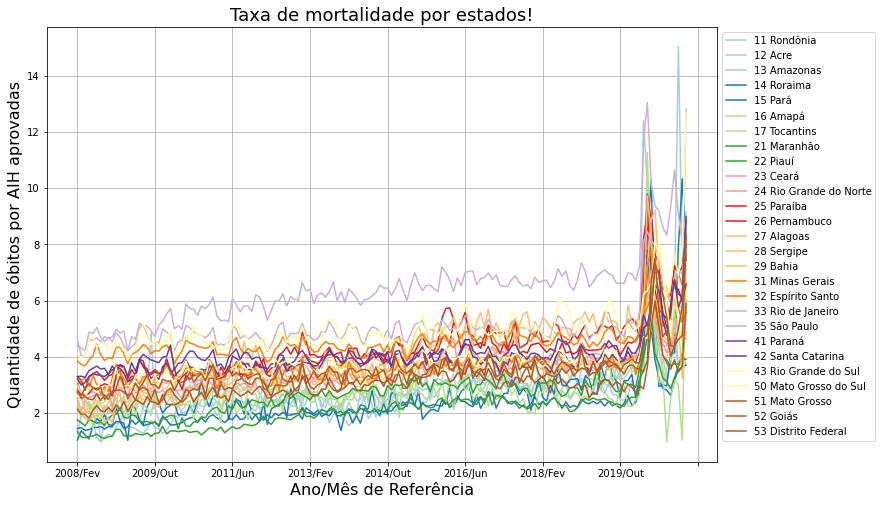

In [7]:
#Plotagem do gráfico da taxa de mortalidade por estado
ax = df_taxa_mortalidade.T.plot(figsize=(12,8), cmap=plt.get_cmap('Paired')) #configuração do tamanho do gráfico e paleta de cor
ax.set_xlabel('Ano/Mês de Referência', fontsize=16) #Descrição do eixo X
ax.set_ylabel('Quantidade de óbitos por AIH aprovadas', fontsize=16) #Descrição do eixo Y
plt.title('Taxa de mortalidade por estados!', fontsize=18) #Titulo
plt.grid(True) #adicionando grade
plt.legend(bbox_to_anchor=(1, 1)) #Posicionando a legenda
plt.show() #Plotando o gráfico